# Electric Vehicles Market Size Analysis using Python

Market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps business to understand magnitude of demand, access market saturation levels, and identify growth opportunies.

In [2]:
## importing necessary libraries to deal with
import pandas as pd
import numpy as np

In [3]:
## reading our data / importing the dataset to our work environment
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [4]:
print(ev_data.head(5))

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [5]:
ev_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


data cleaning and checking for any unwanted records or observations

In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

# # we can impute the missing records by using the impute but in this case we decided to drop the missing values

In [8]:
ev_data = ev_data.dropna()

In [9]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
ev_data.shape

(177473, 17)

In [11]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [12]:
model_year = ev_data['Model Year'].value_counts().sort_index()
model_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [13]:
model_year.index

Index([1997, 1998, 1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='Model Year')

In [14]:
model_year.values

array([    1,     1,     5,     7,     2,     1,    19,    23,   775,
        1614,  4399,  3496,  4826,  5469,  8534, 14286, 10913, 11740,
       19063, 27708, 57519,  7072], dtype=int64)

Lets start with analysing the EV Adoption Over Time by visualizing the number of EVs registered by using model year. It will give us an insigth into how the EV population has grown over years

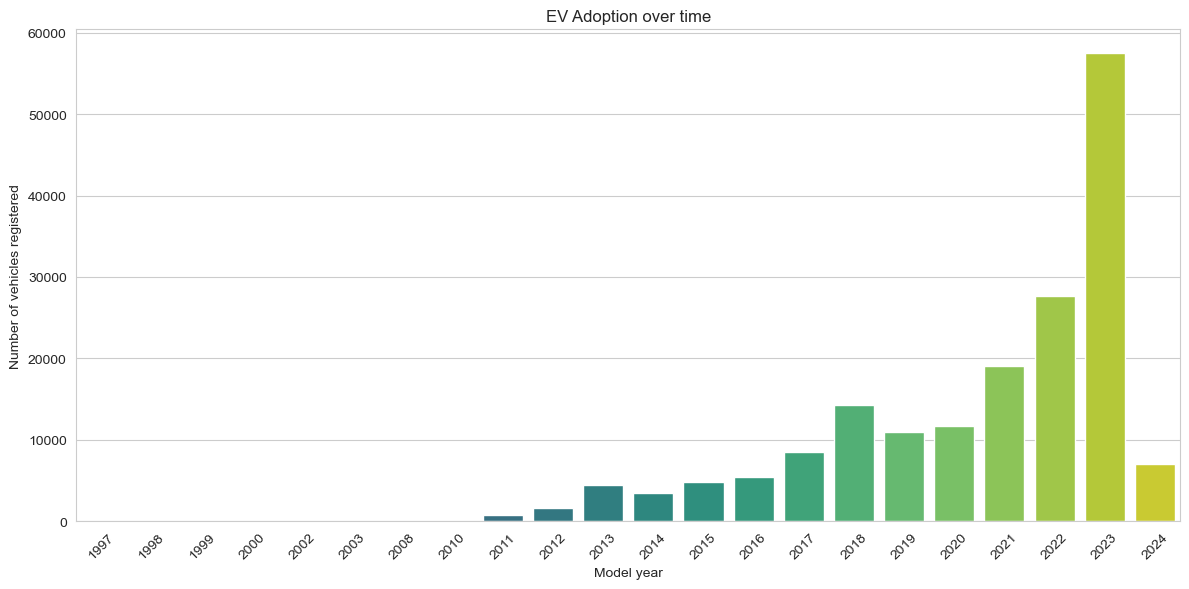

In [15]:
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## EV adoption overtime
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index , y = ev_adoption_by_year.values , palette = "viridis")
plt.title("EV Adoption over time")
plt.xlabel('Model year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

From the above chart, its clear that the EV Adoption has been increasing over time, especially noting a significant upward trend starting around 2014. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2016 and drops a little in the year 2019 and 2020 and rises again onwards.
The year 2023 shows a sharp increase in the number of regisetered EVs, with the bar of 2023 being the highest on the graph

Now let's start selecting the top 3 counties based on EV registrations and the analyse the distribution of EVs within the cities of those counties

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


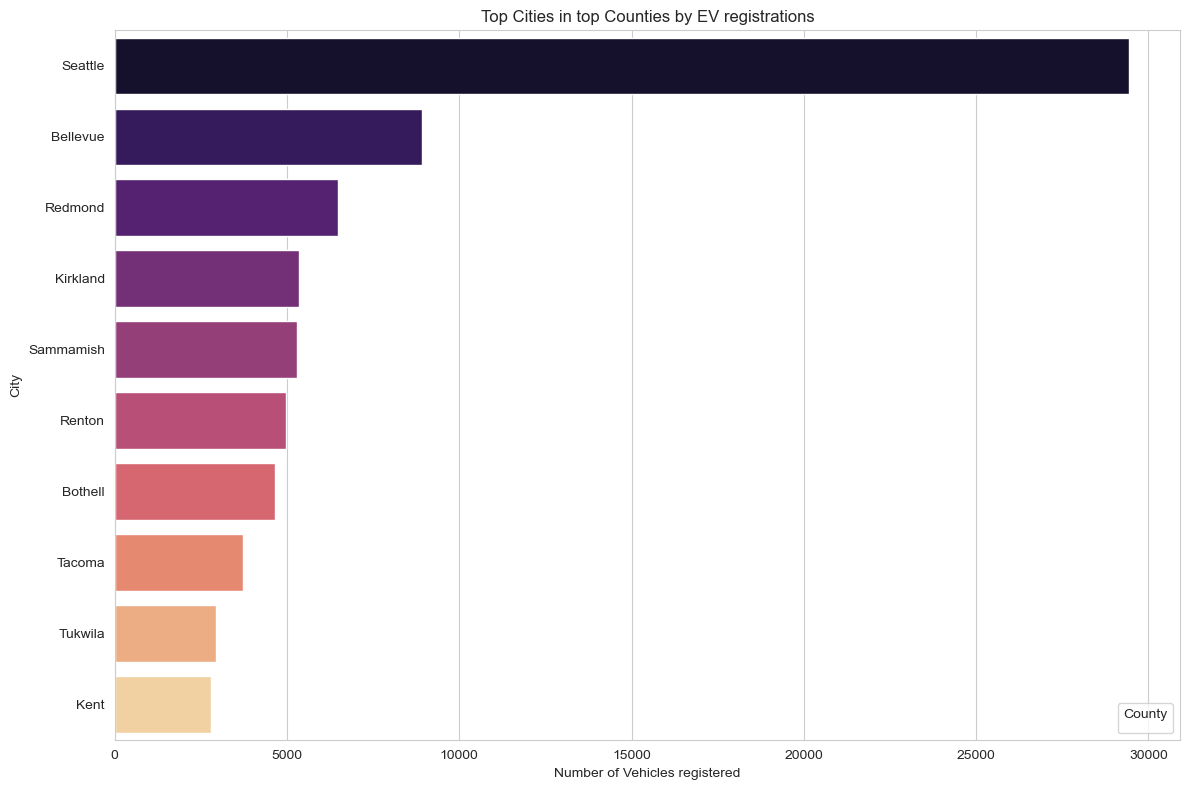

In [60]:
## geographical distribution at county levels
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

## the top 3 counties data
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
#top_counties_data

## analysing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

## visualizing the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Number of Vehicles' , y = 'City'  , data = top_cities, palette = "magma")
plt.title("Top Cities in top Counties by EV registrations")
plt.xlabel('Number of Vehicles registered')
plt.ylabel('City')
plt.legend(title = 'County')
plt.tight_layout()
plt.show()


The above graph compares the number of electric vehicles registered in various cities within Counties: King , Snohomish and Pierce. The horizontal bars represents cities, and their length corresponds to the number of vehicles registered, coloured-coded by county.
-Seattle, which is in King County, has the highest number of EV registrations by a significant margin also Bellevue and Redmond also in King City
-The majority of cities shown are from King County, which seems to dominae EV registrations among the counties
-Overall, the graph indicates that EV distribution is not uniform across the cities and is more concentrated in certain areas, particularly in King County

# Next let's explore the types of EV represented in the dataset. Understating the breakdown between different EV types, such as Battery Electric Vehicles(BEV) and Plug-in Hybrid Electric Vehicles(PHEV)

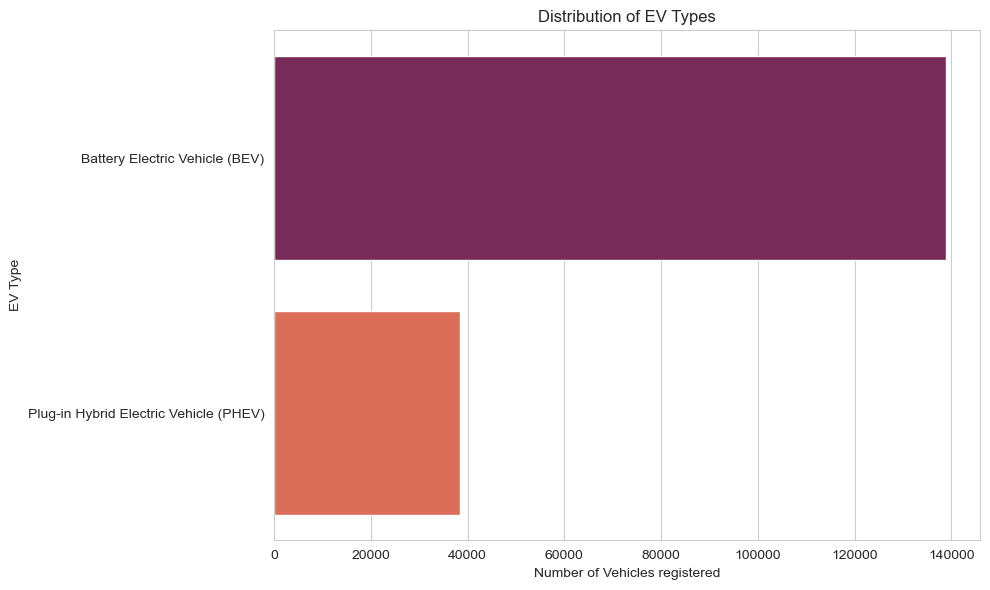

In [44]:
## analyzing the distribution of Electric Vehicles types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
#ev_type_distribution

plt.figure(figsize=(10,6))
sns.barplot(x = ev_type_distribution.values , y = ev_type_distribution.index, palette = "rocket")
plt.title("Distribution of EV Types")
plt.xlabel('Number of Vehicles registered')
plt.ylabel('EV Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in The US

# Now lets focus on the popularity of EV manufactures and models among the registered vehicles. This analysis will help identify which manufactures and specific models dominate the EV market

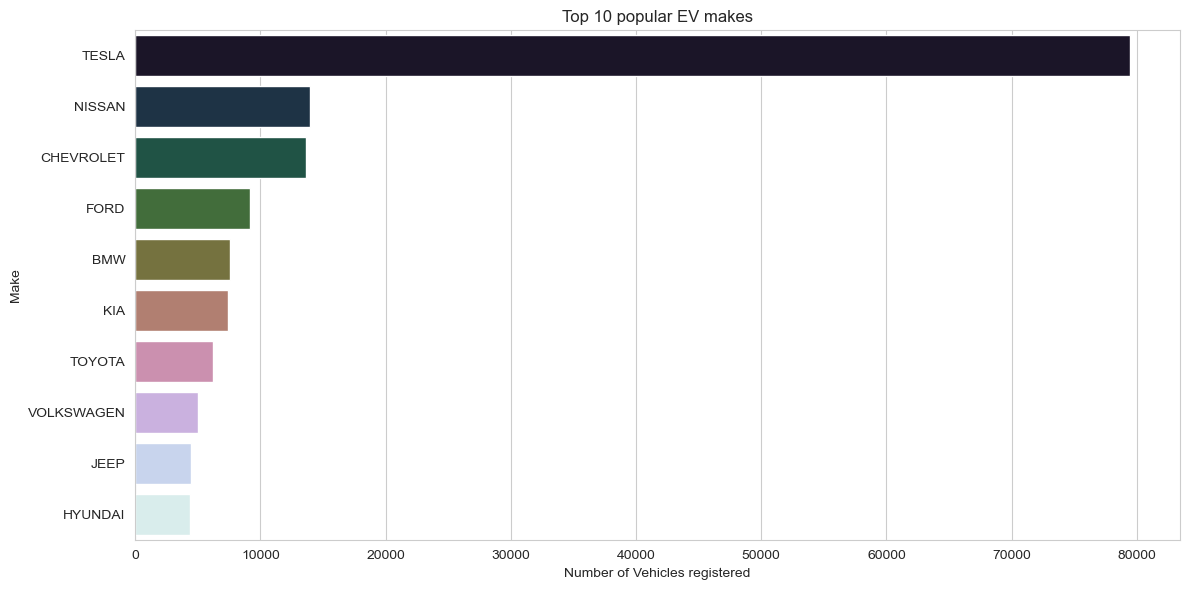

In [50]:
## analysing the popularity of EV manufactures
ev_make_distribution = ev_data['Make'].value_counts().head(10)
#ev_make_distribution

plt.figure(figsize=(12,6))
sns.barplot(x = ev_make_distribution.values , y = ev_make_distribution.index, palette = "cubehelix")
plt.title("Top 10 popular EV makes")
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The above chart shows that TESLA leads by a substatial margin with the highest number of vehicles registered, followed by NISSAN the FORD,BMW and others

# Now lets drill deeper into the most popular models within these top manufactures to get a more detailed understanding of consumer preference at the model level

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


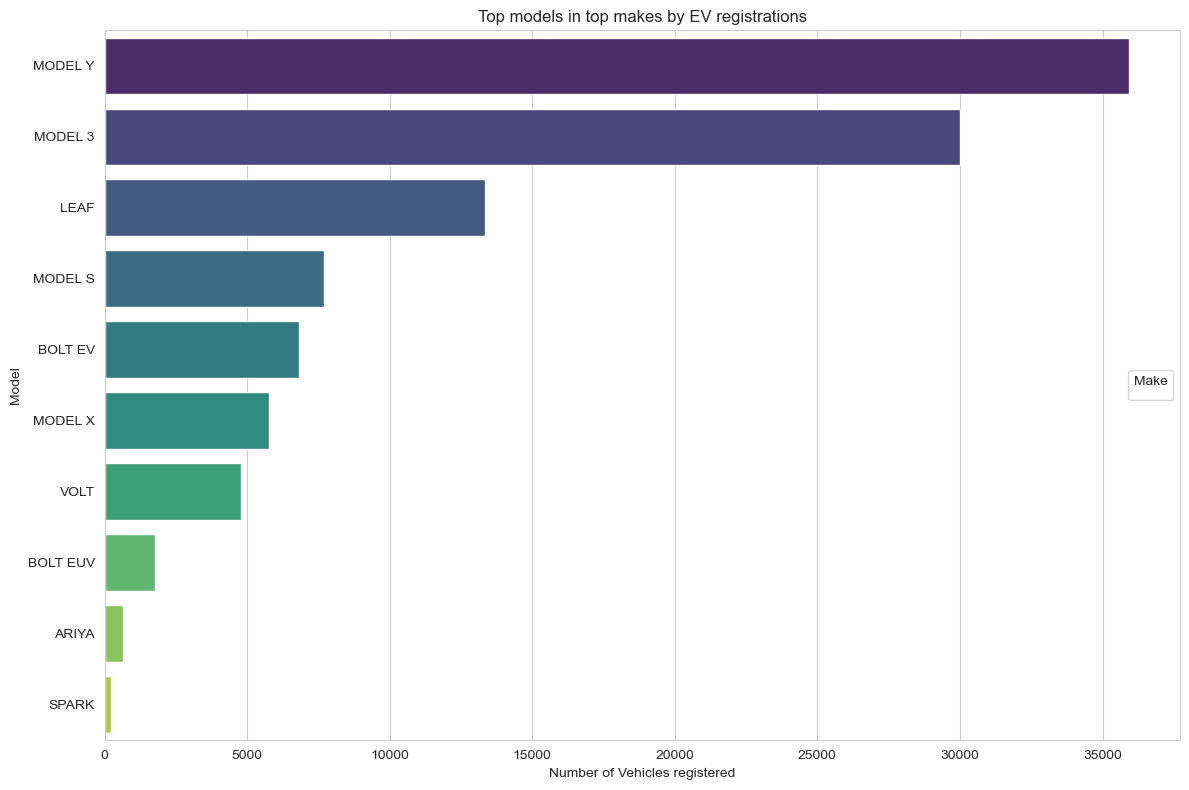

In [62]:
top_3_make = ev_make_distribution.head(3).index
#top_3_make

## filter the dataset for these top three makes
top_makes_data = ev_data[ev_data['Make'].isin(top_3_make)]

## analysing the popularity of EV models within these top 3 manufactures
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending = False).reset_index(name = "Number of Vehicles")

## visualizing the top 10 models across these manufactures
top_model = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Number of Vehicles' , y = 'Model'  ,data = top_model, palette = "viridis")
plt.title("Top models in top makes by EV registrations")
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.tight_layout()
plt.show()

The above graph shows that TESLA's MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations. Followed by NISSAN's LEAF and other models of TESLA  with a significant number of registrations.

# Next, we'll explore the electric range of the EV, which is the critical factor for analyzing the market size of electric vehicles. The range of electric vehicles indicate how far an EV can travel on a single charge.

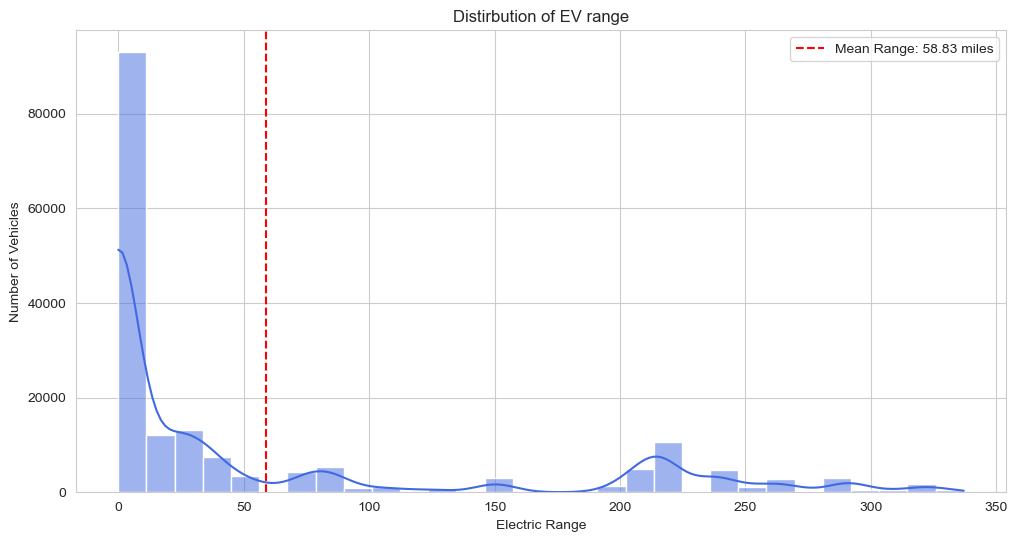

In [69]:
## analyzing the distributio of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins = 30, kde = True, color = 'royalblue')
plt.title("Distirbution of EV range")
plt.xlabel('Electric Range')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color = 'red', linestyle = '--', label = f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range.There is a high frequency of vehicles with a low electric range, with a significant peak occuring just before 50 miles.The distribution is skewed to the right, with a long tail extending toward higher ranges,although the number of vehicles with higher ranges is much less frequent. In conclusion it suggets that while there are EVs avalible with high electric ranges, the average range is skewed lower due to a substatial number of vehicles with shorter range.

# Now lets delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design has influenced th electric range capabilities of electric vehicles over time

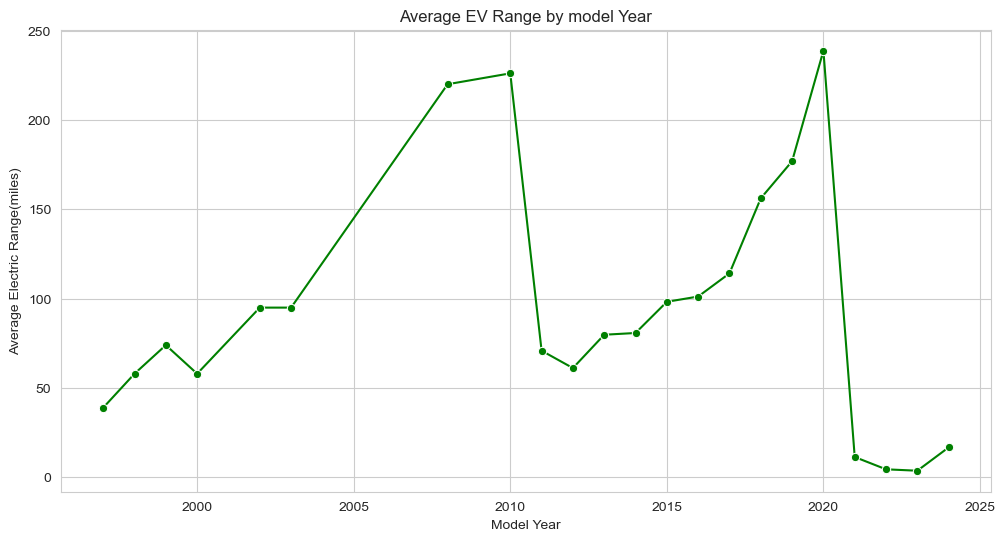

In [72]:
## calculating the average electric range model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

#average_range_by_year

plt.figure(figsize=(12,6))
sns.lineplot(x = 'Model Year' , y = 'Electric Range'  ,data = average_range_by_year, marker = 'o', color = "green")
plt.title("Average EV Range by model Year")
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range(miles)')
plt.grid(True)
plt.show()

The data suggets that while there have been flactuations, the overall trend over the last two decades has been toward icreasing the elecctric range of EVs

# Now lets explore how the electric ranges vary among the top manufactures and models. This analsis can reveal how different manufactures are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities

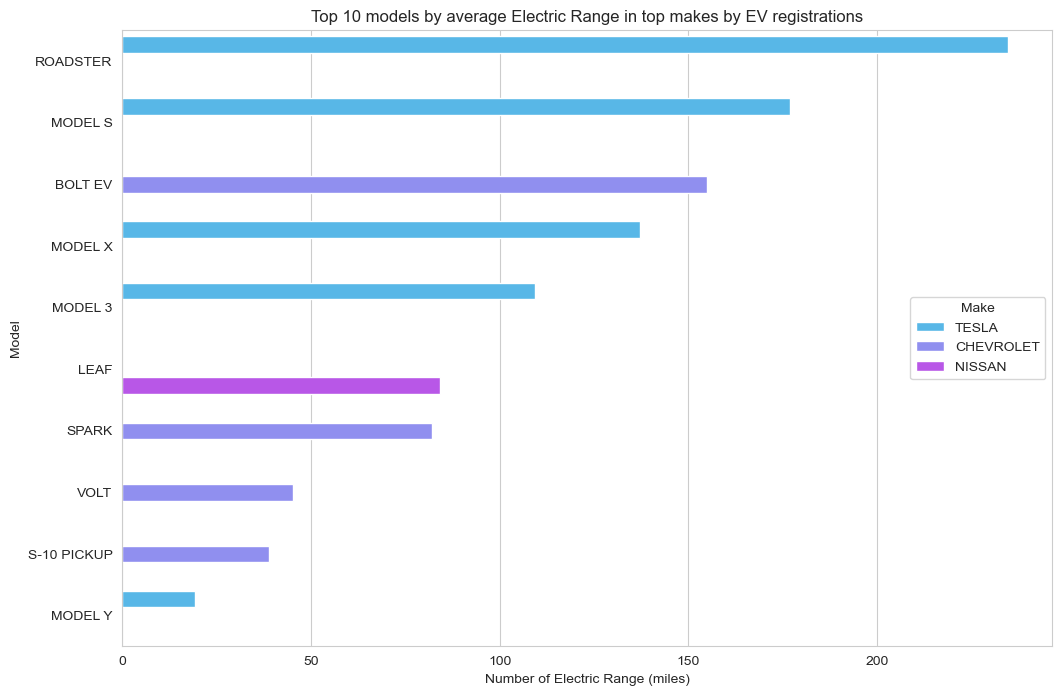

In [83]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

## the top 10 models with the highest avearge electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot = sns.barplot(x = 'Electric Range' , y = 'Model',hue = 'Make' ,data = top_range_models, palette = "cool",errorbar=None)
plt.title("Top 10 models by average Electric Range in top makes by EV registrations")
plt.xlabel('Number of Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

The TESLA ROADSTAR has the highest average electric range among the model listed TESLA's models (ROADSTER, MODEL S, MODEL X and MODEL Y) occupying the majority of the top positions, indicating that on average, TESLA's vehicles have high electric range. The CHEVROLET BOLT EV is an outlier amoung the CHEVROLET models, having a substatially higher range than the VOLT and S-10 PICKUP from maker. NISSAN's LEAF and CHEVROLET's SPARK are in the lower half of the chart, suggesting more modest average ranges.

# END